<a href="https://colab.research.google.com/github/sethorus30/Capstone_1/blob/master/Deeplearning_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import re
import collections
import matplotlib.pyplot as plt

# Packages for data preparation
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Packages for modeling
from keras import models
from keras import layers
from keras import regularizers

In [ ]:
#work on the data story, what are people upset and which , focus on Navies Bayes go back to the Navies Bayes homework

In [2]:
NB_WORDS = 10000  # Parameter indicating the number of words we'll put in the dictionary
VAL_SIZE = 1000  # Size of the validation set
NB_START_EPOCHS = 20  # Number of epochs we usually start to train with
BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent

We read in the csv with the tweets data and perform a random shuffle. It's a good practice to shuffle the data before splitting between a train and test set. That way the sentiment classes are equally distributed over the train and test sets.

We'll only keep the text column as input and the airline_sentiment column as the target.


In [ ]:
We read in the csv with the tweets data and perform a random shuffle. It's a good practice to shuffle the data before splitting between a train and test set. That way the sentiment classes are equally distributed over the train and test sets.

We'll only keep the text column as input and the airline_sentiment column as the target.

In [3]:
from google.colab import files
data_to_load = files.upload()

Saving Tweets.csv to Tweets.csv


In [4]:
#df = pd.read_csv('../input/Tweets.csv')
df = pd.read_csv('Tweets.csv')
df = df.reindex(np.random.permutation(df.index))  
df = df[['text', 'airline_sentiment']]
df.head()

,text,airline_sentiment
9308,@USAirways can you priv chat to help chairman ...,neutral
6056,@SouthwestAir I love you guys! Had to take a f...,positive
4317,@united still waiting for a reply,negative
4579,@SouthwestAir Could you maybe hook (@FuyukaiDe...,neutral
10926,"@Usairways thanks for making miss connection, ...",negative


In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

text = df['text']

print("Original text is\n{}".format('\n'.join(text)))

vectorizer = CountVectorizer(min_df=0)

# call `fit` to build the vocabulary
vectorizer.fit(text)

# call `transform` to convert text to a bag of words
x = vectorizer.transform(text)

# CountVectorizer uses a sparse array to save memory, but it's easier in this assignment to 
# convert back to a "normal" numpy array
x = x.toarray()

print("")
print("Transformed text vector is \n{}".format(x))

# `get_feature_names` tracks which word is associated with each column of the transformed x
print("")
print("Words for each feature:")
print(vectorizer.get_feature_names())

# Notice that the bag of words treatment doesn't preserve information about the *order* of words, 
# just their frequency

Streaming output truncated to the last 5000 lines.
@USAirways strikes again--Late Flight crew #3/4 for the trip and maintenance #2/4.  Worth the extra $200/trip for less hassle and fewer delays
@AmericanAir Great, then tell me how you will fix it? @Suntimes @WSJ @latimes @nytimes #media #filmcrew #photography #cameragear
@SouthwestAir THANK YOU SO MUCH!! http://t.co/tGSB1DfPS3
@VirginAmerica Flying LAX to SFO and after looking at the awesome movie lineup I actually wish I was on a long haul.
@SouthwestAir it's a new day and a new chance for you to do the right thing it's never too Late Flight to be honest.
@SouthwestAir Had to pay a $25 fare difference on a change but can't seem to find the receipt for it. How can I get a copy for reimbursement
@USAirways What's the contact number for the corporate baggage office in Phoenix?
@JetBlue Thanks for taking me back home today despite Pandora's best efforts to Cancelled Flight the flight. #jetblue #backhome #noplacelikehome
@USAirways finally

In [7]:
pip install demoji

In [8]:
import demoji 

In [9]:
demoji.download_codes()

... OK (Got response in 0.10 seconds)
Writing emoji data to /root/.demoji/codes.json ...
... OK


In [ ]:
https://stackoverflow.com/questions/60112444/create-an-emoji-column-in-python-dataframe

In [10]:
pip install emoji --upgrade

     |████████████████████████████████| 51kB 4.4MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49716 sha256=3545327dfbf8b19526537dd3963aacc898b7e8e096c956e66a58d7d655d8f08d
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji


In [11]:
import emoji

In [21]:
emoji_list = []
dummy_list = []
for i in df :
    dummy_list.extend([c for c in df if c in emoji.UNICODE_EMOJI])
    if len(dummy_list) == 0:
        emoji_list.append(np.nan)
    else:
        emoji_list.append(dummy_list)
        dummy_list = []
df['Emoji entry on that content'] = emoji_list


ValueError: ignored

In [16]:
emoji_list

[nan, nan]

In [20]:
emoji_list.info()

AttributeError: ignored

In [19]:
emoji_list=emoji_list.fillna('')

AttributeError: ignored

In [17]:
df.head()

,text,airline_sentiment
9308,@USAirways can you priv chat to help chairman ...,neutral
6056,@SouthwestAir I love you guys! Had to take a f...,positive
4317,@united still waiting for a reply,negative
4579,@SouthwestAir Could you maybe hook (@FuyukaiDe...,neutral
10926,"@Usairways thanks for making miss connection, ...",negative


In [ ]:
emoji_list = []
dummy_list = []
for i in Content:
    dummy_list.extend([c for c in Content if c in emoji.UNICODE_EMOJI])
    if len(dummy_list) == 0:
        emoji_list.append(np.nan)
    else:
        emoji_list.append(dummy_list)
    dummy_list = []

NameError: ignored

In [21]:
df['text'].apply(lambda x: demoji.findall(x))

1917     {}
7916     {}
7072     {}
491      {}
8431     {}
         ..
2656     {}
966      {}
3948     {}
8069     {}
11055    {}
Name: text, Length: 14640, dtype: object

In [22]:
df['text'].apply(lambda x: demoji.findall(x)).value_counts()

#make columns for the emojis, only more than 5 apperances. 

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'dict'


{}                                                                                                         14147
{'😂': 'face with tears of joy'}                                                                               21
{'👍': 'thumbs up'}                                                                                            20
{'😊': 'smiling face with smiling eyes'}                                                                       19
{'😉': 'winking face'}                                                                                         16
                                                                                                           ...  
{'😅': 'grinning face with sweat'}                                                                              1
{'✨': 'sparkles', '✈️': 'airplane', '😍': 'smiling face with heart-eyes', '😱': 'face screaming in fear'}        1
{'💘': 'heart with arrow'}                                                                       

In [ ]:
demoji.findall(df['text'])

TypeError: ignored

In [ ]:
pip install textstat

     |████████████████████████████████| 102kB 3.9MB/s 
     |████████████████████████████████| 1.9MB 16.9MB/s 


In [ ]:
import textstat

Data Cleaning

In [ ]:
def remove_stopwords(input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
        return " ".join(clean_words) 
    
def remove_mentions(input_text):
        return re.sub(r'@\w+', '', input_text)
       
df.text = df.text.apply(remove_stopwords).apply(remove_mentions)
df.head()

,text,airline_sentiment
10056,overloads small plane extra baggage then. Has ...,negative
7451,"hey awesome peeps, what's flight 1159 Boston? ...",negative
7364,WELL...my paid tickets NO assigned seats all. ...,negative
8163,yup! He said would flight change fee. But plan...,neutral
8490,Currently new robotic love-doll. Reminded heav...,neutral


Train-Test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.airline_sentiment, test_size=0.1, random_state=37)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

# Train data samples: 13176
# Test data samples: 1464


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
text = df.text

print("Original text is\n{}".format('\n'.join(text)))

vectorizer = CountVectorizer(min_df=0)

# call `fit` to build the vocabulary
vectorizer.fit(text)

# call `transform` to convert text to a bag of words
x = vectorizer.transform(text)

# CountVectorizer uses a sparse array to save memory, but it's easier in this assignment to 
# convert back to a "normal" numpy array
x = x.toarray()

print("")
print("Transformed text vector is \n{}".format(x))

# `get_feature_names` tracks which word is associated with each column of the transformed x
print("")
print("Words for each feature:")
print(vectorizer.get_feature_names())

# Notice that the bag of words treatment doesn't preserve information about the *order* of words, 
# just their frequency

Streaming output truncated to the last 5000 lines.
hours hold no answer Guess synergy merger really planned
disappointed toll free number. Terrible customer service, flight Cancelled Flightled would like get home
want explain hold 2+ hrs tonight trying reach customer service learn they're Mon-Fr?
I'm trying But I'm tired getting grumpy
Just sent DM. Thank acknowledgment.
flight attendants AA2402 spectacular.Fed ENTIRE cabin food coach. Why keep serving vile food
haha, thanks explanation
load balancing system apparently #systemwide major impact #united airlines flights. Was #cyberattack?
counter agents RDU deserve medal. #thankyou
Maybe machine...
So excited put earlier flight get home! Woo Hoo! #travel 🎉🎉🎉
cust serv reps unable change reservations system Check unaware Cancelled Flights got word night
Thanks Karen Salisbury IAH amazing customer service! Found daughter's bag lost UA1516. Made day!
thanks beareavement discount anymore not book online
Mad love http://t.co/4ojrSDWPkK NYC-
w

Converting words to numbers

In [ ]:
tk = Tokenizer(num_words=NB_WORDS,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=" ")
tk.fit_on_texts(X_train)

print('Fitted tokenizer on {} documents'.format(tk.document_count))
print('{} words in dictionary'.format(tk.num_words))
print('Top 5 most common words are:', collections.Counter(tk.word_counts).most_common(5))

Fitted tokenizer on 13176 documents
10000 words in dictionary
Top 5 most common words are: [('flight', 3519), ('not', 1429), ('no', 1349), ('get', 1224), ('t', 1114)]


In [ ]:
X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

print('"{}" is converted into {}'.format(X_train.values[0], X_train_seq[0]))
#.values to convert the dataframe 

" Today not finest. All could prevented one gate agent advising 200 passengers." is converted into [41, 2, 2896, 249, 93, 6067, 26, 30, 84, 4317, 453, 140]


In [ ]:
def one_hot_seq(seqs, nb_features = NB_WORDS):
    ohs = np.zeros((len(seqs), nb_features))
    for i, s in enumerate(seqs):
        ohs[i, s] = 1.
    return ohs

X_train_oh = one_hot_seq(X_train_seq)
X_test_oh = one_hot_seq(X_test_seq)

print('"{}" is converted into {}'.format(X_train_seq[0], X_train_oh[0]))
print('For this example we have {} features with a value of 1.'.format(X_train_oh[0].sum()))

"[41, 2, 2896, 249, 93, 6067, 26, 30, 84, 4317, 453, 140]" is converted into [0. 0. 1. ... 0. 0. 0.]
For this example we have 12.0 features with a value of 1.


Converting the target classes to numbers

In [ ]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

print('"{}" is converted into {}'.format(y_train[0], y_train_le[0]))
print('"{}" is converted into {}'.format(y_train_le[0], y_train_oh[0]))

"neutral" is converted into 0
"0" is converted into [1. 0. 0.]


In [ ]:
X_train_rest, X_valid, y_train_rest, y_valid = train_test_split(X_train_oh, y_train_oh, test_size=0.1, random_state=37)

assert X_valid.shape[0] == y_valid.shape[0]
assert X_train_rest.shape[0] == y_train_rest.shape[0]

print('Shape of validation set:',X_valid.shape)

Shape of validation set: (1318, 10000)


Splitting of a validation set

In [ ]:
base_model = models.Sequential()
base_model.add(layers.Dense(64, activation='relu', input_shape=(NB_WORDS,)))
base_model.add(layers.Dense(64, activation='relu'))
base_model.add(layers.Dense(3, activation='softmax'))
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640064    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 644,419
Trainable params: 644,419
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def deep_model(model):
    model.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])
    
    history = model.fit(X_train_rest
                       , y_train_rest
                       , epochs=NB_START_EPOCHS
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=0)
    
    return history

In [ ]:
base_history = deep_model(base_model)

In [ ]:
def eval_metric(history, metric_name):
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.legend()
    plt.show()

e can see here that the validation loss starts to increase as from epoch 4. The training loss continues to lower, which is normal as the model is trained to fit the train data as good as possible.

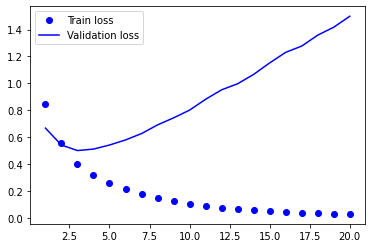

In [ ]:
eval_metric(base_history, 'loss')

Just as with the validation loss, the validation accuracy peaks at an early epoch. After that, it goes down slightly. So to conclude, we can say that the model starts overfitting as from epoch 4.

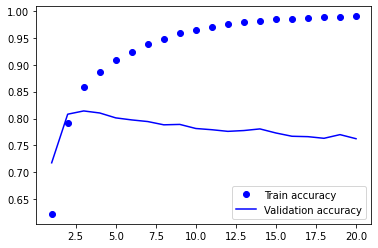

In [ ]:
eval_metric(base_history, 'accuracy') 

Handling overfitting

Now, we can try to do something about the overfitting. There are different options to do that.

Option 1: reduce the network's size by removing layers or reducing the number of hidden elements in the layers
Option 2: add regularization, which comes down to adding a cost to the loss function for large weights
Option 3: adding dropout layers, which will randomly remove certain features by setting them to zero

Reducing the network's size
We reduce the network's size by removing one layer and lowering the number of hidden elements in the remaining layer to 32.

In [ ]:
reduced_model = models.Sequential()
reduced_model.add(layers.Dense(32, activation='relu', input_shape=(NB_WORDS,)))
reduced_model.add(layers.Dense(3, activation='softmax'))
reduced_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 99        
Total params: 320,131
Trainable params: 320,131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
reduced_history = deep_model(reduced_model)

In [ ]:
def compare_loss_with_baseline(h, model_name):
    loss_base_model = base_history.history['val_loss']
    loss_model = h.history['val_loss']

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, loss_base_model, 'bo', label='Validation Loss Baseline Model')
    plt.plot(e, loss_model, 'b', label='Validation Loss ' + model_name)
    plt.legend()
    plt.show()

We can see that it takes more epochs before the reduced model starts overfitting (around epoch 10). Moreover, the loss increases much slower after that epoch compared to the baseline model.

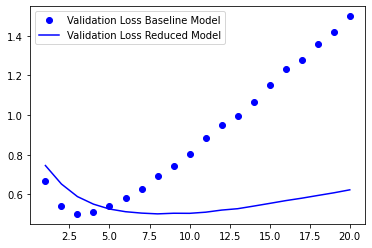

In [ ]:
compare_loss_with_baseline(reduced_history, 'Reduced Model')

Adding regularization
To address overfitting, we can also add regularization to the model. Let's try with L2 regularization.

In [ ]:
reg_model = models.Sequential()
reg_model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(NB_WORDS,)))
reg_model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
reg_model.add(layers.Dense(3, activation='softmax'))
reg_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 195       
Total params: 644,419
Trainable params: 644,419
Non-trainable params: 0
_________________________________________________________________


In [ ]:
reg_history = deep_model(reg_model)

For the regularized model we notice that it starts overfitting earlier than the baseline model. However, the loss increases much slower afterwards.

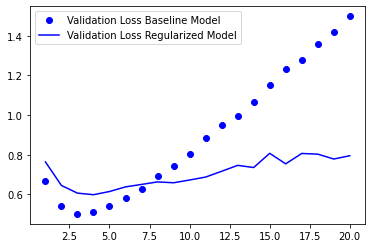

In [ ]:
compare_loss_with_baseline(reg_history, 'Regularized Model')

Adding dropout layers
The last option we'll try is to add dropout layers.

In [ ]:
drop_model = models.Sequential()
drop_model.add(layers.Dense(64, activation='relu', input_shape=(NB_WORDS,)))
drop_model.add(layers.Dropout(0.5))
drop_model.add(layers.Dense(64, activation='relu'))
drop_model.add(layers.Dropout(0.5))
drop_model.add(layers.Dense(3, activation='softmax'))
drop_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                640064    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 195       
Total params: 644,419
Trainable params: 644,419
Non-trainable params: 0
_________________________________________________________________


In [ ]:
drop_history = deep_model(drop_model)

The model with dropout layers starts overfitting a bit later than the baseline model. The loss also increases slower than the baseline model.

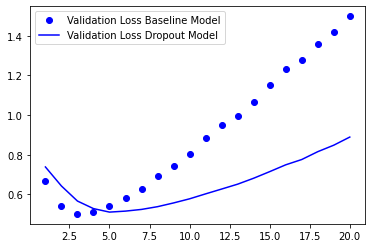

In [ ]:
compare_loss_with_baseline(drop_history, 'Dropout Model')

Training on the full train data and evaluation on test data
At first sight the reduced model seems to be the best model for generalization. But let's check that on the test set.

In [ ]:
def test_model(model, epoch_stop):
    model.fit(X_train_oh
              , y_train_oh
              , epochs=epoch_stop
              , batch_size=BATCH_SIZE
              , verbose=0)
    results = model.evaluate(X_test_oh, y_test_oh)
    
    return results

In [ ]:
base_results = test_model(base_model, 4)
print('/n')
print('Test accuracy of baseline model: {0:.2f}%'.format(base_results[1]*100))

46/46 [==============================] - 0s 2ms/step - loss: 1.0928 - accuracy: 0.7691
/n
Test accuracy of baseline model: 76.91%


In [ ]:
reduced_results = test_model(reduced_model, 10)
print('/n')
print('Test accuracy of reduced model: {0:.2f}%'.format(reduced_results[1]*100))

46/46 [==============================] - 0s 2ms/step - loss: 0.7108 - accuracy: 0.7896
/n
Test accuracy of reduced model: 78.96%


In [ ]:
reg_results = test_model(reg_model, 5)
print('/n')
print('Test accuracy of regularized model: {0:.2f}%'.format(reg_results[1]*100))

46/46 [==============================] - 0s 3ms/step - loss: 0.7659 - accuracy: 0.7923
/n
Test accuracy of regularized model: 79.23%


In [ ]:
drop_results = test_model(drop_model, 6)
print('/n')
print('Test accuracy of dropout model: {0:.2f}%'.format(drop_results[1]*100))

46/46 [==============================] - 0s 2ms/step - loss: 0.8363 - accuracy: 0.7964
/n
Test accuracy of dropout model: 79.64%
